In [1]:
#import necessary libaries
import pandas
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#dataset fetching to Numpy Array
dataset = pandas.read_csv('test-Minimum-Error-Rate-Classifier.txt', header = None)
dataset=np.array(dataset)

In [3]:
#define values of mean,sigma
min1 = [0.,0.]
min1=np.array(min1)
min2 = [2.,2.]
min2=np.array(min2)
sigma1 = [[.25,.3],[.3,1.]]
sigma1=np.array(sigma1)
sigma2 = [[.5,0.],[0.,.5]]
sigma2=np.array(sigma2)

In [4]:
#define values of prior
prior1 = 0.5
prior2 = 0.5
a=np.zeros([6,3])

In [5]:
#define empty class
class1=[[]]
class2=[[]]

In [6]:
#copy variable and assign
temp = np.empty_like(dataset) 
temp[:] = dataset 

In [7]:
#copy data
a[:,0]=dataset[:,0]
a[:,1]=dataset[:,1]

In [8]:
#posterior,likelihood,prior
b=[]
res1 = 0
res2 = 0
print(b)
for i in range(len(temp)):
    
        res1 = -0.5*np.dot(np.dot((temp[i,:]-min1).T,np.linalg.inv(sigma1)),(temp[i,:]-min1))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma1))+np.log(prior1)
        x = np.linalg.inv(sigma1)
        #print(x)
        res2 = -0.5*np.dot(np.dot((temp[i,:]-min2).T,np.linalg.inv(sigma2)),(temp[i,:]-min2))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma2))+np.log(prior2)
        if (res1 > res2):                                                                                                        
          b.append(1)
        else:
          b.append(2)
        
print(b)

[]
[1, 1, 2, 2, 1, 2]


In [9]:
#assigning class to a
for i in range(len(b)):
    a[i][-1]=b[i]
print(a)

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 0.   2.   1. ]
 [ 2.  -3.   2. ]]


In [10]:
#separating two class
class1 =[([i[0],i[1],i[2]]) for i in a if i[2] == 1]
class1 = np.array(class1)
class2 =[([i[0],i[1],i[2]]) for i in a if i[2] == 2]
class2 = np.array(class2)
print(class1)
print(class2)

[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  2.  1.]]
[[ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 2.  -3.   2. ]]


Text(0, 0.5, 'y')

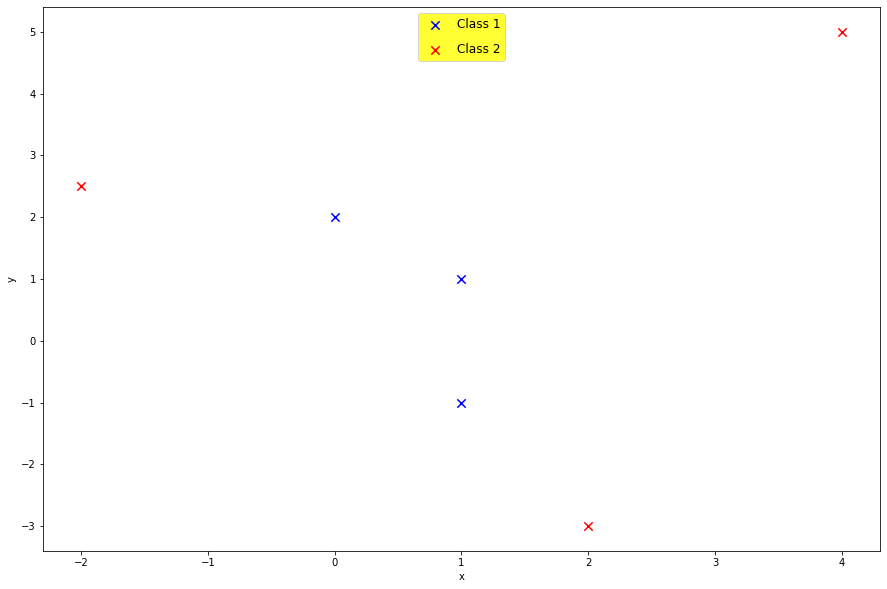

In [11]:
#plotting dataset in 2d
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

#scatting train values
axis.scatter(class1[:,0],class1[:,1],marker='x',color='blue',s=70,label='Class 1')
axis.scatter(class2[:,0],class2[:,1],marker='x',color='red',s=70,label='Class 2')
#labeling decoration 
legend = axis.legend(loc='upper center',fontsize='large',labelspacing=1.0)
legend.get_frame().set_facecolor('yellow')
axis.set_xlabel('x')
axis.set_ylabel('y')

In [12]:
#distribution calculation
def mulv(pos,mu,Sigma):
    res1=np.zeros([30,30])
    for i in range(len(X)):
        for j in range(len(X[0])):
             r0 = (np.sqrt(np.linalg.det(Sigma))*2*np.pi) 
             r1 = 1/r0
             r2 = -.5*np.dot(np.dot((pos[i,j]-mu).T,np.linalg.inv(Sigma)),(pos[i,j]-mu))
             r3 = np.exp(r2)
             r4 = r1 * r3
             res1[i][j]=r4
    return res1

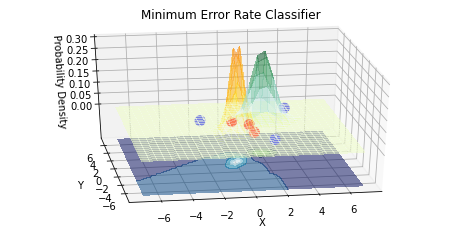

In [14]:
#poltting
N = 30
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = mulv(pos,min1,sigma1)
Z1 = mulv(pos, min2, sigma2)
db=(Z-Z1)
#print(type(db))
#db[:,:]=db[:,:]/40
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figheight(4)
fig.set_figwidth(8)
z=0
ax.scatter(class1[:,0],class1[:,1],color='red',alpha=1,s=100)
ax.scatter(class2[:,0],class2[:,1],color='blue',alpha=1,s=100)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=False,
               cmap=cm.Wistia,alpha=.3)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=False,
                cmap=cm.BuGn,alpha=.3)
#ax.contourf(X, Y, Z, zdir='z', offset=-.15,cmap=cm.ocean,alpha=0.1)
#ax.contourf(X, Y, Z1, zdir='z', offset=-.15,cmap=cm.ocean,alpha=0.1)
ax.contourf(X, Y, db, zdir='z', offset=-.15,cmap=cm.ocean,alpha=0.5)
ax.set_title('Minimum Error Rate Classifier')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_zlim(-0.15,.2)
ax.set_zticks(np.linspace(.30,0.0,7))
ax.view_init(30, -99)
#ax.view_init(270, -105)
plt.show()